# Rozhodovací stromy v praxi - použití sklearn

## Cíl lekce

Po dokončení této lekce budete:
- **Umět použít** rozhodovací strom pomocí knihovny sklearn
- **Rozumět problému overfitting** (přeučení)
- **Vědět, jak nastavit** parametr max_depth
- **Umět vizualizovat** natrénovaný strom

## Co je sklearn?

**Scikit-learn** (zkráceně sklearn) je knihovna pro strojové učení v Pythonu.

### Výhody použití sklearn:
- **Jednoduchý kód** - strom vytvoříte na 3 řádky
- **Automatické učení** - sám najde nejlepší otázky
- **Mnoho možností** - různé parametry pro kontrolu

### Základní použití (pseudokód):
```python
1. Vytvoř model: model = DecisionTreeClassifier()
2. Natrénuj model: model.fit(data, výsledky)
3. Předpověz: predikce = model.predict(nová_data)
```

## Problém overfitting (přeučení)

**Overfitting** = když se strom naučí trénovací data "nazpaměť" místo obecných pravidel.

### Analogie ze školy:

| Situace | Student | Rozhodovací strom |
|---------|---------|-------------------|
| **Dobrý přístup** | Pochopí princip | Najde obecné pravidlo |
| **Overfitting** | Naučí se příklady nazpaměť | Zapamatuje si konkrétní data |
| **Výsledek** | Nezvládne nové příklady | Špatně předpovídá nová data |

### Příklad overfittingu:

**Přeučený strom (špatný):**
- "Pokud hodiny = 5.5 A účast = 73% A věk = 21 → Projde"
- Příliš specifické!

**Obecný strom (dobrý):**
- "Pokud hodiny > 2 → Projde"
- Jednoduché pravidlo, které funguje!

### Jak poznat overfitting:

| Metrika | Dobrý strom | Přeučený strom |
|---------|-------------|----------------|
| Přesnost na trénovacích datech | 85% | 100% |
| Přesnost na nových datech | 82% | 60% |
| Rozdíl | 3% | 40% ⚠️ |

## Parametr max_depth - kontrola velikosti stromu

**max_depth** = maximální počet úrovní stromu (hloubka)

### Vliv max_depth:

| max_depth | Strom | Výhody | Nevýhody |
|-----------|-------|--------|----------|
| 1 | Velmi jednoduchý | Rychlý, srozumitelný | Může být nepřesný |
| 2-3 | Jednoduchý | Dobrá rovnováha | Vhodný pro malé datasety ✅ |
| 4-5 | Střední | Zachytí složitější vztahy | Stále srozumitelný |
| >10 | Hluboký | Velmi přesný na trénovacích datech | Riziko overfittingu! ⚠️ |
| None | Neomezený | Maximální detail | Vysoké riziko overfittingu! ❌ |

### Doporučení:
Pro náš dataset (6 studentů) použijeme **max_depth = 2**

## Použití DecisionTreeClassifier

### Krok 1: Příprava dat
Data musí být ve formátu:
- **X** = matice features (hodiny, účast)
- **y** = vektor výsledků (0=neprojde, 1=projde)

### Krok 2: Vytvoření modelu
```python
model = DecisionTreeClassifier(max_depth=2)
```

### Krok 3: Trénování
```python
model.fit(X, y)
```

### Krok 4: Predikce
```python
predikce = model.predict(nová_data)
```

## Náš dataset - 6 studentů

Použijeme stejná data jako v první lekci:

| Student | Hodiny učení | Účast (%) | Prošel |
|---------|-------------|-----------|--------|
| A | 5 | 90 | Ano (1) |
| B | 4 | 85 | Ano (1) |
| C | 2 | 70 | Ne (0) |
| D | 1 | 60 | Ne (0) |
| E | 3 | 75 | Ano (1) |
| F | 2 | 95 | Ne (0) |

## Import knihoven

Nyní, když rozumíme teorii, můžeme importovat potřebné knihovny:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Nastavení pro hezčí grafy
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## Praktická ukázka - trénování stromu

In [2]:
# Příprava dat - naši studenti
X = np.array([
    [5, 90],  # Student A
    [4, 85],  # Student B
    [2, 70],  # Student C
    [1, 60],  # Student D
    [3, 75],  # Student E
    [2, 95],  # Student F
])

y = np.array([1, 1, 0, 0, 1, 0])  # 1=prošel, 0=neprošel

# Vytvoření a natrénování modelu
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

# Výpis informací o modelu
print(f"Model natrénován!")
print(f"Přesnost na trénovacích datech: {model.score(X, y)*100:.0f}%")

Model natrénován!
Přesnost na trénovacích datech: 100%


## Testování na nových studentech

In [3]:
# Noví studenti pro testování
novi_studenti = np.array([
    [3.5, 80],  # Student G: 3.5 hodiny, 80% účast
    [1.5, 90],  # Student H: 1.5 hodiny, 90% účast
    [6, 70],    # Student I: 6 hodin, 70% účast
])

# Predikce
predikce = model.predict(novi_studenti)

# Zobrazení výsledků
jmena = ['G', 'H', 'I']
for i, (student, pred) in enumerate(zip(jmena, predikce)):
    vysledek = "Projde ✅" if pred == 1 else "Neprojde ❌"
    print(f"Student {student}: {vysledek}")

Student G: Projde ✅
Student H: Neprojde ❌
Student I: Projde ✅


## Vizualizace stromu

In [4]:
# Vizualizace rozhodovacího stromu
plt.figure(figsize=(12, 8))
plot_tree(model, 
          feature_names=['Hodiny učení', 'Účast (%)'],
          class_names=['Neprojde', 'Projde'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Náš rozhodovací strom (max_depth=2)', fontsize=14, fontweight='bold')
plt.show()

## Demonstrace overfittingu

In [5]:
# Porovnání různých hodnot max_depth
depths = [1, 2, 3, None]
modely = []
presnosti = []

for depth in depths:
    # Vytvoření modelu
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X, y)
    
    # Uložení výsledků
    modely.append(model)
    presnosti.append(model.score(X, y))

# Vizualizace
plt.figure(figsize=(10, 6))
x_labels = [str(d) if d else 'Neomezená' for d in depths]
colors = ['green' if p < 1.0 else 'red' for p in presnosti]

bars = plt.bar(x_labels, presnosti, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Přesnost na trénovacích datech', fontsize=12)
plt.title('Vliv max_depth na přesnost', fontsize=14, fontweight='bold')
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3, axis='y')

# Přidání hodnot na sloupce
for bar, presnost in zip(bars, presnosti):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{presnost*100:.0f}%', ha='center', fontweight='bold')

# Označení overfittingu
if presnosti[-1] == 1.0:
    plt.annotate('Možný overfitting!\n(100% přesnost)', 
                xy=(len(depths)-1, 1.0), 
                xytext=(len(depths)-1.5, 0.8),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, color='red', fontweight='bold')

plt.show()

## Porovnání modelů - vizualizace

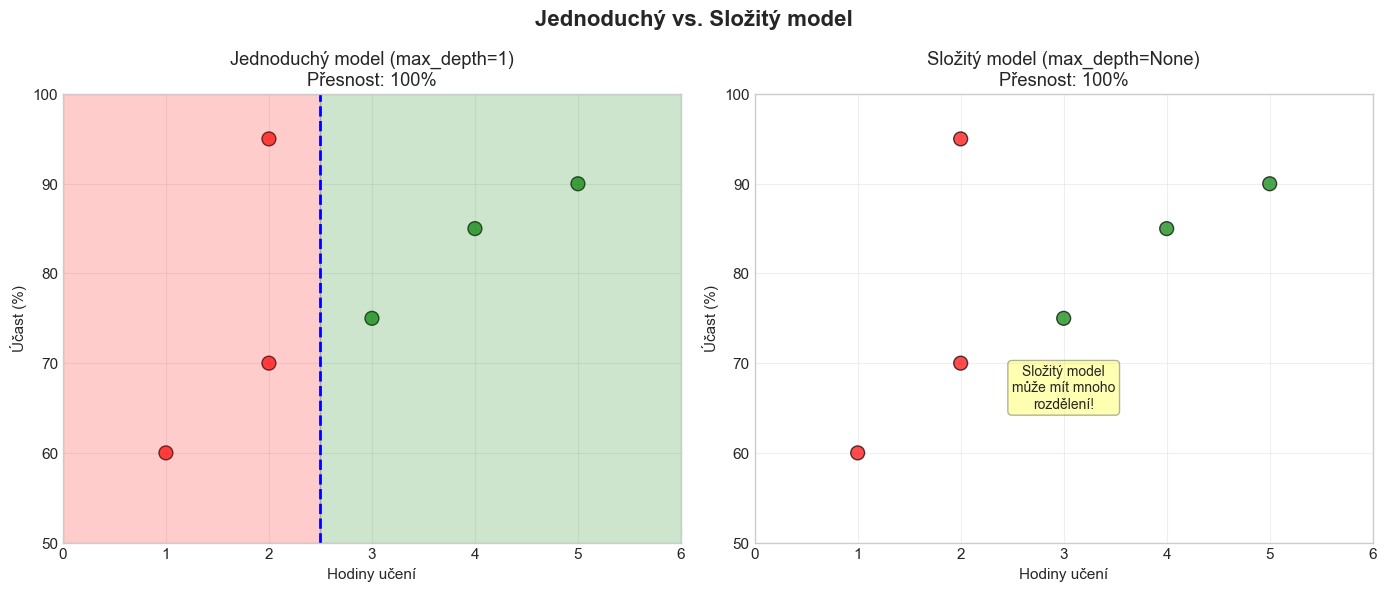

In [6]:
# Vizualizace rozhodovacích hranic pro různé modely
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Model 1: Jednoduchý (max_depth=1)
model_simple = DecisionTreeClassifier(max_depth=1, random_state=42)
model_simple.fit(X, y)

# Graf 1: Jednoduchý model
colors = ['red' if y_val == 0 else 'green' for y_val in y]
axes[0].scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7, edgecolor='black')

# Rozhodovací hranice
axes[0].axvline(x=2.5, color='blue', linestyle='--', linewidth=2)
axes[0].fill_betweenx([50, 100], 0, 2.5, alpha=0.2, color='red')
axes[0].fill_betweenx([50, 100], 2.5, 6, alpha=0.2, color='green')

axes[0].set_xlabel('Hodiny učení')
axes[0].set_ylabel('Účast (%)')
axes[0].set_title(f'Jednoduchý model (max_depth=1)\nPřesnost: {model_simple.score(X, y)*100:.0f}%')
axes[0].set_xlim(0, 6)
axes[0].set_ylim(50, 100)
axes[0].grid(True, alpha=0.3)

# Model 2: Složitější (max_depth=None)
model_complex = DecisionTreeClassifier(max_depth=None, random_state=42)
model_complex.fit(X, y)

# Graf 2: Složitý model
axes[1].scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7, edgecolor='black')

# Poznámka o složitosti
axes[1].text(3, 65, 'Složitý model\nmůže mít mnoho\nrozdělení!', 
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3),
            fontsize=10, ha='center')

axes[1].set_xlabel('Hodiny učení')
axes[1].set_ylabel('Účast (%)')
axes[1].set_title(f'Složitý model (max_depth=None)\nPřesnost: {model_complex.score(X, y)*100:.0f}%')
axes[1].set_xlim(0, 6)
axes[1].set_ylim(50, 100)
axes[1].grid(True, alpha=0.3)

plt.suptitle('Jednoduchý vs. Složitý model', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Shrnutí

### Co jsme se naučili:

1. **Použití sklearn** - strom vytvoříme na 3 řádky kódu
2. **Overfitting** - když strom "memoruje" místo učení
3. **max_depth** - kontroluje velikost stromu
4. **Vizualizace** - můžeme vidět, jak strom rozhoduje

### Praktické tipy:

| Tip | Důvod |
|-----|-------|
| Začněte s malým max_depth (2-3) | Prevence overfittingu |
| Testujte na nových datech | Ověření, že model funguje |
| Vizualizujte strom | Pochopení rozhodování |
| Pokud přesnost = 100%, pozor! | Možný overfitting |

### Kód na zapamatování:
```python
# Tři základní kroky
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)
predikce = model.predict(nová_data)
```